## Import libraries

In [139]:
import pandas as pd

## Load Datasets

In [140]:
basics_df = pd.read_csv("../movie-recommender-system/basics_data_.tsv",sep="\t")
basics_df.head()

C:\Users\I531722\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,0,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,0,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,0,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,0,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,0,1,"Comedy,Short"


In [141]:
crew_df = pd.read_csv("../movie-recommender-system/crew_data.tsv",sep="\t")
crew_df.head()

,tconst,directors,writers
0,tt0000001,nm0005690,\N
1,tt0000002,nm0721526,\N
2,tt0000003,nm0721526,\N
3,tt0000004,nm0721526,\N
4,tt0000005,nm0005690,\N


In [142]:
principals_df = pd.read_csv("../movie-recommender-system/principals_data.tsv",sep="\t")
principals_df.head()

,tconst,ordering,nconst,category,job,characters
0,tt0000001,1,nm1588970,self,\N,"[""Self""]"
1,tt0000001,2,nm0005690,director,\N,\N
2,tt0000001,3,nm0374658,cinematographer,director of photography,\N
3,tt0000002,1,nm0721526,director,\N,\N
4,tt0000002,2,nm1335271,composer,\N,\N


In [143]:
ratings_df = pd.read_csv("../movie-recommender-system/ratings_data.tsv",sep="\t")
ratings_df.head()

,tconst,averageRating,numVotes
0,tt0000001,5.6,1655
1,tt0000002,6.1,201
2,tt0000003,6.5,1367
3,tt0000004,6.2,122
4,tt0000005,6.2,2149


In [144]:
names_df = pd.read_csv("../movie-recommender-system/names_data.tsv",sep="\t")
names_df.head()

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0050419,tt0072308,tt0053137,tt0031983"
1,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack","tt0117057,tt0037382,tt0038355,tt0071877"
2,nm0000003,Brigitte Bardot,1934,\N,"actress,soundtrack,music_department","tt0049189,tt0054452,tt0057345,tt0059956"
3,nm0000004,John Belushi,1949,1982,"actor,soundtrack,writer","tt0078723,tt0077975,tt0072562,tt0080455"
4,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor","tt0083922,tt0050986,tt0060827,tt0050976"


#### Filtering Data

In [145]:
#Filtering just movies
basics_df.query("titleType == 'movie'", inplace=True)
basics_df.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
8,tt0000009,movie,Miss Jerry,Miss Jerry,0,1894,0,45,Romance
331,tt0000335,movie,Soldiers of the Cross,Soldiers of the Cross,0,1900,0,0,"Biography,Drama"
498,tt0000502,movie,Bohemios,Bohemios,0,1905,0,100,0
570,tt0000574,movie,The Story of the Kelly Gang,The Story of the Kelly Gang,0,1906,0,70,"Biography,Crime,Drama"
610,tt0000615,movie,Robbery Under Arms,Robbery Under Arms,0,1907,0,0,Drama


In [146]:
#Filtering just actor and actress
principals_df=principals_df.query("category in ['actor', 'actress']")
principals_df.head()

,tconst,ordering,nconst,category,job,characters
11,tt0000005,1,nm0443482,actor,\N,"[""Blacksmith""]"
12,tt0000005,2,nm0653042,actor,\N,"[""Assistant""]"
16,tt0000007,1,nm0179163,actor,\N,\N
17,tt0000007,2,nm0183947,actor,\N,\N
21,tt0000008,1,nm0653028,actor,\N,"[""Sneezing Man""]"


#### Merging Dataframes

In [147]:
# Merging Names and Crew dataframe to get director names 
directors_df=pd.merge(names_df,crew_df,left_on='nconst',right_on='directors',how='inner')
directors_df = directors_df.rename(columns={'primaryName':'directorName'})
directors_df= directors_df[['tconst','directorName']]
directors_df

,tconst,directorName
0,tt0038468,Ingmar Bergman
1,tt0038675,Ingmar Bergman
2,tt0039834,Ingmar Bergman
3,tt0040418,Ingmar Bergman
4,tt0040622,Ingmar Bergman
...,...,...
3456862,tt8743742,Fotis Georgopoulos
3456863,tt8744074,Art Jones
3456864,tt8744160,Ibrahim-Aloduley
3456865,tt9046122,Eli Bevins


In [148]:
# Merging Names and Principals dataframe to get Actor Names
cast_df= pd.merge(names_df,principals_df,on='nconst',how='inner')
cast_df = cast_df.rename(columns={'primaryName':'actorName'})
cast_df

,nconst,actorName,birthYear,deathYear,primaryProfession,knownForTitles,tconst,ordering,category,job,characters
0,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0050419,tt0072308,tt0053137,tt0031983",tt0025164,1,actor,\N,"[""Guy Holden""]"
1,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0050419,tt0072308,tt0053137,tt0031983",tt0026942,2,actor,\N,"[""Huck Haines""]"
2,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0050419,tt0072308,tt0053137,tt0031983",tt0027125,1,actor,\N,"[""Jerry Travers""]"
3,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0050419,tt0072308,tt0053137,tt0031983",tt0027630,1,actor,\N,"[""Bake Baker""]"
4,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0050419,tt0072308,tt0053137,tt0031983",tt0028333,1,actor,\N,"[""Lucky Garnett""]"
...,...,...,...,...,...,...,...,...,...,...,...
16714909,nm9993708,Eli Bevins,\N,\N,"director,writer,editor","tt11772904,tt11772858,tt11702702,tt11772940",tt11697102,1,actress,\N,"[""Art Seller""]"
16714910,nm9993708,Eli Bevins,\N,\N,"director,writer,editor","tt11772904,tt11772858,tt11702702,tt11772940",tt11702702,1,actress,\N,"[""Passionate Poet""]"
16714911,nm9993708,Eli Bevins,\N,\N,"director,writer,editor","tt11772904,tt11772858,tt11702702,tt11772940",tt11772842,2,actress,\N,"[""Eli""]"
16714912,nm9993709,Lu Bevins,\N,\N,"director,writer,cinematographer","tt11772940,tt11772904,tt11772858,tt11702702",tt11702702,2,actress,\N,"[""Observant Poet""]"


In [149]:
# Taking actor 1
cast1_df=cast_df.query("ordering == 1")
cast1_df = cast1_df[['tconst','actorName']]
#cast1_df

In [150]:
# Taking actor 2
cast2_df=cast_df.query("ordering == 2")
cast2_df = cast2_df[['tconst','actorName']]
#cast2_df

In [151]:
# Taking actor 3
cast3_df=cast_df.query("ordering == 3")
cast3_df = cast3_df[['tconst','actorName']]
#cast1_df

In [152]:
# Taking unique tconst and changing numpy array to dataframe
cast_tconst_array = cast_df['tconst'].unique()
cast_tconst = pd.DataFrame(cast_tconst_array,columns=["tconst"])
#cast_tconst

In [153]:
# Merging unique tconst and  all 3 actors in one dataframe
final_cast= pd.merge(cast_tconst,cast1_df,on='tconst',how='inner').merge(cast2_df,on='tconst',how='left').merge(cast3_df,on='tconst',how='left')
                    
final_cast

,tconst,actorName_x,actorName_y,actorName
0,tt0025164,Fred Astaire,Ginger Rogers,Alice Brady
1,tt0026942,Irene Dunne,Fred Astaire,Ginger Rogers
2,tt0027125,Fred Astaire,Ginger Rogers,Edward Everett Horton
3,tt0027630,Fred Astaire,Ginger Rogers,Randolph Scott
4,tt0028333,Fred Astaire,Ginger Rogers,Victor Moore
...,...,...,...,...
3974870,tt8743674,Beverly,NaN,NaN
3974871,tt8743704,Jessy,NaN,NaN
3974872,tt8743714,Nyla,NaN,NaN
3974873,tt8744122,Yukari Funaki,Hiroko Ide,NaN


In [154]:
# Remove unused columns and change names of columns
basics_df = basics_df[['tconst','primaryTitle','startYear','genres']]
basics_df = basics_df.rename(columns={'primaryTitle':'title', 'startYear':'year'})
basics_df

,tconst,title,year,genres
8,tt0000009,Miss Jerry,1894,Romance
331,tt0000335,Soldiers of the Cross,1900,"Biography,Drama"
498,tt0000502,Bohemios,1905,0
570,tt0000574,The Story of the Kelly Gang,1906,"Biography,Crime,Drama"
610,tt0000615,Robbery Under Arms,1907,Drama
...,...,...,...,...
7294831,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,Documentary
7294858,tt9916680,De la ilusión al desconcierto: cine colombiano...,2007,Documentary
7294870,tt9916706,Dankyavar Danka,2013,Comedy
7294881,tt9916730,6 Gunn,2017,0


In [155]:
# Removing zeros from data
basics_df= basics_df.query("tconst != '0'")
basics_df=basics_df.query("title != '0'")
basics_df=basics_df.query("year != 0")
basics_df=basics_df.query("genres != '0'")
basics_df

,tconst,title,year,genres
8,tt0000009,Miss Jerry,1894,Romance
331,tt0000335,Soldiers of the Cross,1900,"Biography,Drama"
570,tt0000574,The Story of the Kelly Gang,1906,"Biography,Crime,Drama"
610,tt0000615,Robbery Under Arms,1907,Drama
625,tt0000630,Hamlet,1908,Drama
...,...,...,...,...
7294790,tt9916538,Kuambil Lagi Hatiku,2019,Drama
7294831,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,Documentary
7294858,tt9916680,De la ilusión al desconcierto: cine colombiano...,2007,Documentary
7294870,tt9916706,Dankyavar Danka,2013,Comedy


In [156]:
# Take movies whose release year is after 1975
basics_df=basics_df.query("year > 1975")
basics_df

,tconst,title,year,genres
15492,tt0015724,Dama de noche,1993,"Drama,Mystery,Romance"
16662,tt0016906,Frivolinas,2014,"Comedy,Musical"
34811,tt0035423,Kate & Leopold,2001,"Comedy,Fantasy,Romance"
35975,tt0036606,"Another Time, Another Place",1983,"Drama,War"
38019,tt0038687,Let There Be Light,1980,"Documentary,War"
...,...,...,...,...
7294790,tt9916538,Kuambil Lagi Hatiku,2019,Drama
7294831,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,Documentary
7294858,tt9916680,De la ilusión al desconcierto: cine colombiano...,2007,Documentary
7294870,tt9916706,Dankyavar Danka,2013,Comedy


In [157]:
ratings_df = ratings_df[['tconst','averageRating']]
ratings_df

,tconst,averageRating
0,tt0000001,5.6
1,tt0000002,6.1
2,tt0000003,6.5
3,tt0000004,6.2
4,tt0000005,6.2
...,...,...
1085490,tt9916580,7.2
1085491,tt9916690,6.6
1085492,tt9916720,6.0
1085493,tt9916766,6.9


In [158]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'average rating distribution')

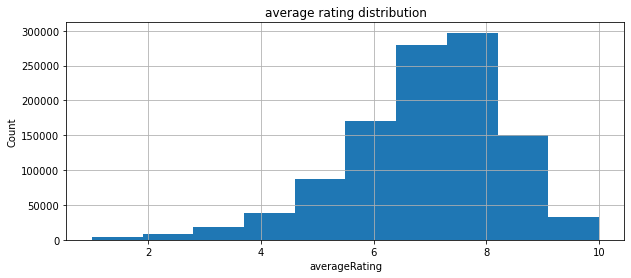

In [159]:
# plot graph of 'average rating column' 
plt.figure(figsize =(10, 4)) 
  
ratings_df['averageRating'].hist(bins = 10)
plt.xlabel('averageRating')
plt.ylabel('Count')
plt.title(r'average rating distribution')

### Final Files to CSV

In [160]:
directors_df.to_pickle('directors.pkl')

In [161]:
final_cast.to_pickle('actorCast.pkl')

In [162]:
basics_df.to_pickle('moviesData.pkl')

In [163]:
ratings_df.to_pickle('ratingsData.pkl')